In [15]:
import pandas as pd
import numpy as np

import warnings

import warnings

warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("./salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
x = df['YearsExperience']
y = df['Salary']

In [7]:
def linear_regression(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den

    B0 = y_mean - (B1*x_mean)

    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))

    return (B0, B1, reg_line)

N = len(x)
x_mean = x.mean()
y_mean = y.mean()

B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1 * x_mean)

B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)

def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

Regression Line:  y = 25792.20019866869 + 9449.962β


In [10]:
y = predict(B0,B1,x)
print(y)

df['predicted'] = y
n = len(y)
act=df["Salary"]
pred=df["predicted"]
mse = sum([(act[i] - pred[i])**2 for i in range(n)]) / n
print("MSE:", mse)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
Name: YearsExperience, dtype: float64
MSE: 31270951.72228097


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

if X_train.ndim == 1:
    X_train = X_train.values.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.values.reshape(-1, 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LASSO

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
print("Coefficients:",lasso_model.coef_)
print("Intercept:",lasso_model.intercept_)

# RIDGE

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Coefficients (Ridge):", ridge_model.coef_)
print("Intercept (Ridge):", ridge_model.intercept_)

(24,)
(6,)
Mean Squared Error: 1.883284237699102
Coefficients: [24407.71893277]
Intercept: 73593.25960802895
Mean Squared Error (Ridge): 1795253.686531499
Coefficients (Ridge): [23432.37017546]
Intercept (Ridge): 73593.25960802895


In [16]:
import cvxpy as cp
import numpy as np

n = 10
np.random.seed(1)
A = np.random.randn(n, n)
x_star = np.random.randn(n)
b = A @ x_star
epsilon = 1e-2

x = cp.Variable(n)
mse = cp.sum_squares(A @ x - b)/n
problem = cp.Problem(cp.Minimize(cp.length(x)), [mse <= epsilon])
print("Is problem DQCP?: ", problem.is_dqcp())

problem.solve(qcp=True)
print("Found a solution, with length: ", problem.value)

print("MSE: ", mse.value)

print("x: ", x.value)

print("x_star: ", x_star)

Is problem DQCP?:  True
Found a solution, with length:  8.0
MSE:  0.009260093288136623
x:  [-2.58366030e-01  1.38434327e+00  2.10714108e-01  9.44811159e-01
 -1.14622208e+00  1.51283929e-01  6.62931941e-01 -1.16358584e+00
  2.78132907e-13 -1.76314786e-13]
x_star:  [-0.44712856  1.2245077   0.40349164  0.59357852 -1.09491185  0.16938243
  0.74055645 -0.9537006  -0.26621851  0.03261455]


[Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), 

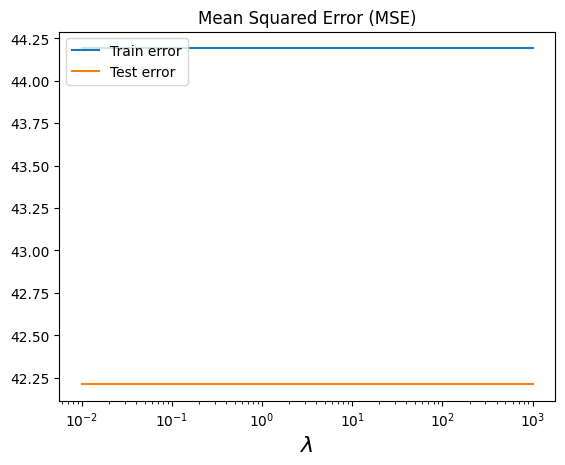

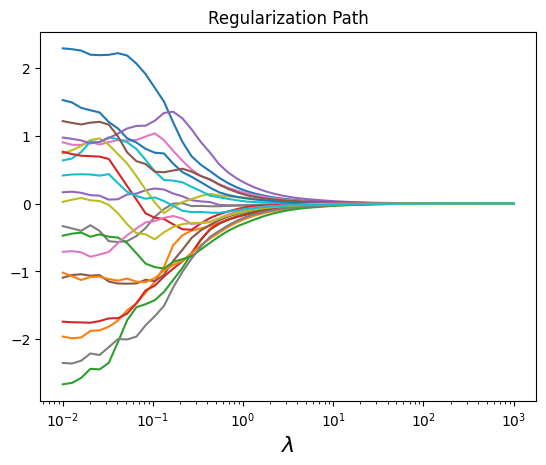

In [17]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(X, Y, beta):
    preds=X @ beta
    # Y=Y.reshape(-1,1)
    loss=cp.sum(cp.abs(preds-Y))/len(Y)
    return loss

def regularizer(beta, lambd):
    return (lambd / (2)) * cp.sum_squares(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + regularizer(beta, lambd)

def mse(X, Y, beta):
    preds=X @ beta
    mse=cp.sum((preds-Y)**2)/len(Y)
    return mse

def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    # Generate an ill-conditioned data matrix
    X = np.random.randn(m, n)
    # Corrupt the observations with additive Gaussian noise
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y

m = 100
n = 20
sigma = 5

X, Y = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

print(train_errors, test_errors, lambd_values)
train_errors_values = [train_error.value for train_error in train_errors]
test_errors_values = [test_error.value for test_error in test_errors]
plot_train_test_errors(train_errors_values, test_errors_values, lambd_values)

def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)


[Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()), 

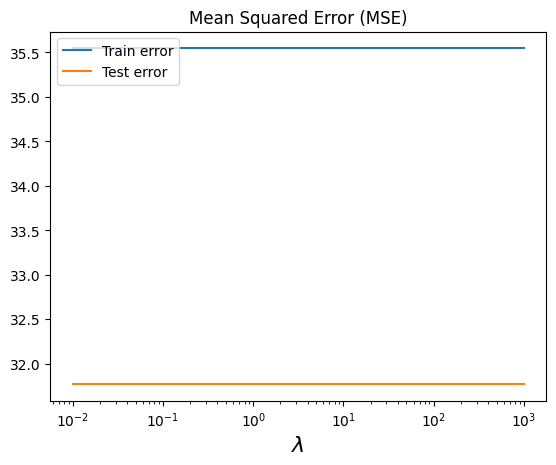

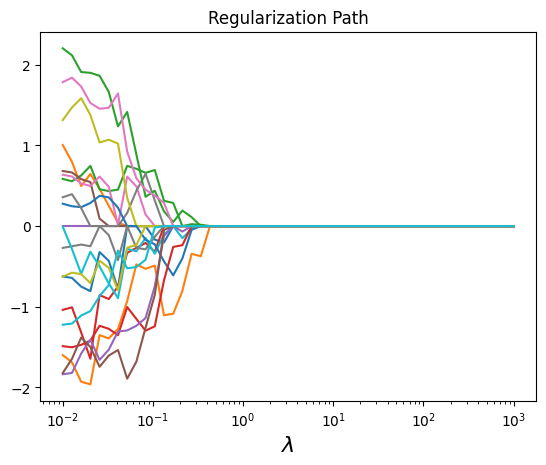

[array([-6.24662681e-01,  1.00506545e+00,  5.84758136e-01, -1.03886727e+00,
        6.32134212e-10,  6.82846660e-01,  6.36799710e-01, -2.70577682e-01,
        1.31457572e+00, -9.49581745e-03,  2.77576120e-01, -1.60135594e+00,
        2.20456082e+00, -1.48940987e+00, -1.83805127e+00, -1.82271299e+00,
        1.78489690e+00,  3.57512377e-01, -6.27228600e-01, -1.22378183e+00]), array([-6.42912923e-01,  7.96551605e-01,  5.55818368e-01, -1.00778395e+00,
       -1.81889202e-10,  6.64902753e-01,  6.14664355e-01, -2.50541540e-01,
        1.47103788e+00, -2.84341723e-01,  2.45877609e-01, -1.69002362e+00,
        2.11818486e+00, -1.50333137e+00, -1.82134390e+00, -1.64700938e+00,
        1.84127240e+00,  3.95624931e-01, -5.77985986e-01, -1.20897543e+00]), array([-7.50690064e-01,  4.96219066e-01,  6.28255556e-01, -1.31922755e+00,
       -9.89106117e-10,  5.81954357e-01,  5.27869610e-01, -2.29307699e-01,
        1.58576908e+00, -5.91658532e-01,  2.34546479e-01, -1.93037992e+00,
        1.91008855e+

In [18]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(X, Y, beta):
    preds=X @ beta
    # Y=Y.reshape(-1,1)
    loss=cp.sum(cp.abs(preds-Y))/len(Y)
    return loss

def regularizer(beta, lamd):
    return lambd*cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + regularizer(beta, lambd)

def mse(X, Y, beta):
    preds=X @ beta
    mse=cp.sum((preds-Y)**2)/len(Y)
    return mse

def generate_data(m=100, n=20, sigma=5, density=0.2):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    idxs = np.random.choice(range(n), int((1-density)*n), replace=False)
    for idx in idxs:
        beta_star[idx] = 0
    X = np.random.randn(m,n)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y, beta_star

m = 100
n = 20
sigma = 5
density = 0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

print(train_errors, test_errors, lambd_values)
train_errors_values = [train_error.value for train_error in train_errors]
test_errors_values = [test_error.value for test_error in test_errors]
plot_train_test_errors(train_errors_values, test_errors_values, lambd_values)

def plot_regularization_path(lambd_values, beta_values):
    num_coeffs= len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)

print(beta_values)